In [1]:
import tensorflow as tf
import os

In [2]:
os.path.join('data', 'happy')
os.listdir('data')

['happy', 'sad']

In [3]:
# Remove dodgy images
import cv2
import imghdr
from matplotlib import pyplot as plt

In [4]:
data_dir = 'data'

In [5]:
img_exts = ['jpeg','jpg','bmp','png']

In [ ]:
img = cv2.imread(os.path.join('data','happy','smile.woman_.jpg'))
img.shape

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)
        

Issue with image data/happy/images9.jpg
Issue with image data/happy/happy-people3.jpg
Issue with image data/happy/happy-person.jpeg
Issue with image data/happy/group-of-happy-people-2.jpg
Issue with image data/happy/nm-how-happiness-affects-health-tnail.jpg
Issue with image data/happy/GettyImages-565706549-949x534.jpg
Issue with image data/happy/56f455011e0000b300705475.jpeg
Issue with image data/happy/image4.jpeg
Issue with image data/happy/image11.jpeg
Issue with image data/happy/images8.jpg
Issue with image data/happy/happyball-3.jpg
Issue with image data/happy/happy-people_1463241208.jpg
Issue with image data/happy/_happy_jumping_on_beach-40815.jpg
Issue with image data/happy/10-Habits-of-Happy-People-Seniors-Today.jpg
Issue with image data/happy/happy-people.jpg
Issue with image data/happy/friends-happy-190821.jpg
Issue with image data/happy/box2_slide6.png
Issue with image data/happy/images20.jpg
Issue with image data/happy/images26.jpg
Issue with image data/happy/images12.jpg
Is

Issue with image data/sad/crying-at-work.jpg
Issue with image data/sad/sad-more-money.jpg
Issue with image data/sad/thoughtful-sad-non-binary-person-lying-on-bed-732x549-thumbnail-732x549.jpg
Issue with image data/sad/depression-1020x680.jpg
Issue with image data/sad/images14.jpg
Issue with image data/sad/image6.jpeg
Issue with image data/sad/images16.jpg
Issue with image data/sad/images31.jpg
Issue with image data/sad/images25.jpg
Issue with image data/sad/boy-with-head-down.jpg
Issue with image data/sad/images5.jpg
Issue with image data/sad/image16.jpeg
Issue with image data/sad/images22.jpg
Issue with image data/sad/images11.jpg
Issue with image data/sad/image7.jpeg
Issue with image data/sad/1000_F_58495935_Nr9VzQljLyN3RKKhGDGxQDBEkqIeLzrZ.jpg
Issue with image data/sad/images2.jpg
Issue with image data/sad/sad-group-people-problems-17033671.jpg
Issue with image data/sad/dark-depression-mood-people-wallpaper-preview.jpg
Issue with image data/sad/image15.jpeg
Issue with image data/sad

In [ ]:
# Load data
tf.data.Dataset??

In [7]:
import numpy as np

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 271 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
data_iterator

In [12]:
# Get another batch from the iterator
batch = data_iterator.next()

In [13]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [14]:
# Class 1 = Sad People
# Class 0 = Happy People 
batch[1]

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

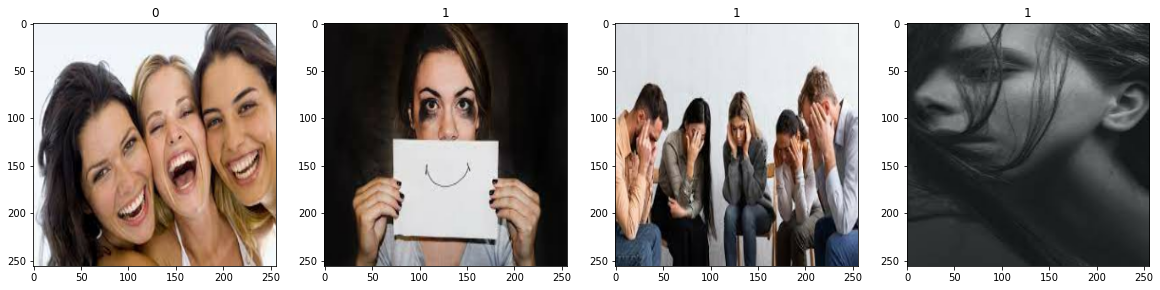

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
# Preprocess Data
# Scale data
data = data.map(lambda x, y: (x/225, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [17]:
scaled_iterator = data.as_numpy_iterator()

In [18]:
scaled_iterator

In [20]:
batch = scaled_iterator.next()

In [22]:
batch[0].max()

1.1333333

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


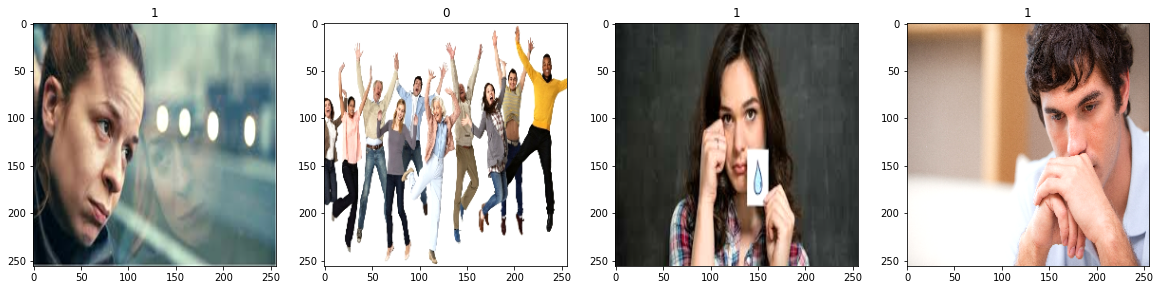

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [24]:
# Split data
len(data)

9

In [36]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [43]:
train_size + val_size + test_size

9

In [ ]:
train = data.take(train_size)
val = data.skip